STANDARD LAMP 018W TESTS COMPARISON BEFORE AND AFTER CALIBRATIONS

      Mean_before  Mean_after  DeltaN_before  DeltaN_after  RefRr
Test                                                             
A            61.0        57.0          -0.24          3.92   61.2
C            62.3        58.4          -0.15          3.96   62.6
D            63.1        59.0          -0.41          4.07   63.4


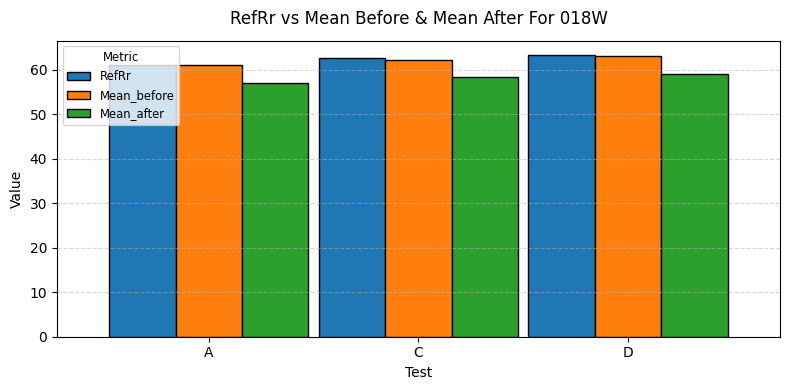

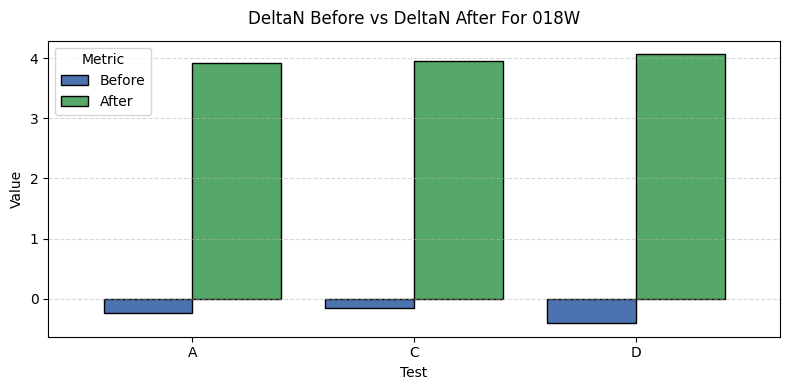

In [31]:
import re
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt


# Load the data file
with open('018W.txt', 'r') as f:
    content = f.read()

# Split into two runs by blank lines
sections = [sec.strip() for sec in re.split(r'\n\s*\n', content) if sec.strip()]

data_runs = {}
for sec in sections:
    lines = [L for L in sec.splitlines() if L.strip()]
    date = lines[0]                         
    
    # The header is on line 3, data starts on line 4
    data_lines = lines[4:]
    df = pd.read_csv(
        StringIO('\n'.join(data_lines)),
        sep=r'\s+',          
        header=None,
        names=[
            'Test','m1','m2','m3','Mean',
            'N_value','N_ref','Delta_N','Ref_Rr'
        ]
    )
    df.set_index('Test', inplace=True)
    
    # Keep only the columns of interest, cast to float
    df = df[['Mean','Delta_N','Ref_Rr']].astype(float)
    data_runs[date] = df

# Identify before/after by date order
dates = list(data_runs.keys())
before_df = data_runs[dates[0]]
after_df  = data_runs[dates[1]]

# Build a comparison DataFrame
df_compare = pd.DataFrame({
    'Mean_before':   before_df['Mean'],
    'Mean_after':    after_df['Mean'],
    'DeltaN_before': before_df['Delta_N'],
    'DeltaN_after':  after_df['Delta_N'],
    'RefRr':         before_df['Ref_Rr'],
})

print(df_compare)


# Plot RefRr, Mean before & Mean after
ax1 = df_compare[['RefRr', 'Mean_before', 'Mean_after']] \
    .plot(
        kind='bar',
        figsize=(8, 4),
        rot=0,
        width=0.95,
        edgecolor='black'
    )

ax1.set_title('RefRr vs Mean Before & Mean After For 018W', pad=12)
ax1.set_xlabel('Test')
ax1.set_ylabel('Value')
ax1.legend(title='Metric', loc='upper left', fontsize='small', title_fontsize='small')
ax1.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# Plot DeltaN before vs DeltaN after
ax2 = df_compare[['DeltaN_before', 'DeltaN_after']] \
    .plot(
        kind='bar',
        figsize=(8, 4),
        color=['#4C72B0','#55A868'],
        rot=0,
        width=0.8,
        edgecolor='black'
    )

ax2.set_title('DeltaN Before vs DeltaN After For 018W', pad=12)
ax2.set_xlabel('Test')
ax2.set_ylabel('Value')
ax2.legend(title='Metric', labels=['Before','After'])
ax2.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


STANDARD LAMP 018Y TESTS COMPARISON BEFORE AND AFTER CALIBRATIONS

        Mean_before  DeltaN_before  Mean_after  DeltaN_after  RefRr
Test                                                               
Test A         61.0          -0.21        57.1          3.92  61.43
Test C         62.2          -0.35        58.3          3.87  62.75
Test D         63.0           0.40        59.0          4.77  63.67


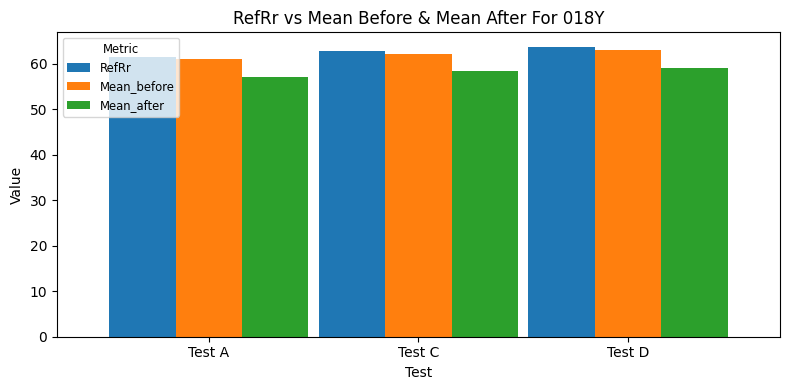

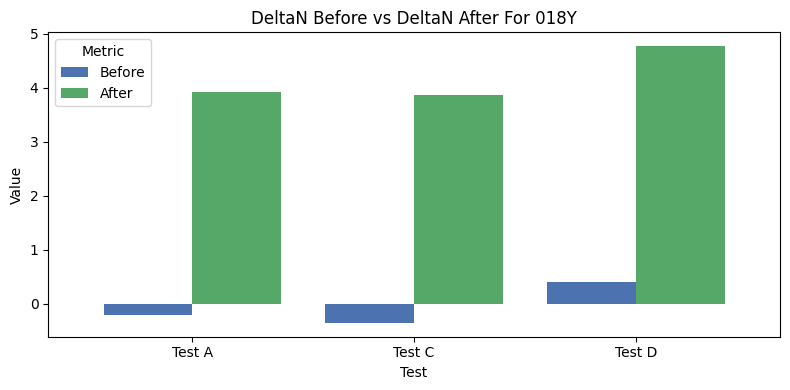

In [20]:
import pandas as pd

# data file
filename = '018Y.txt'

# Containers for parsed results
results = {
    'Test': [],
    'Mean_before': [],
    'DeltaN_before': [],
    'Mean_after': [],
    'DeltaN_after': [],
    'RefRr': []
}

with open(filename, 'r') as f:
    lines = f.readlines()

mode = None
for line in lines:
    line = line.strip()
    # switch context when hitting the date lines
    if line.startswith('23/05/2025'):
        mode = 'before'
        continue
    elif line.startswith('25/08/2025'):
        mode = 'after'
        continue

    # only data lines start with "Test"
    if not line.startswith('Test'):
        continue

    parts = line.split()
    # reconstruct the test name, e.g. "Test A"
    test_name = ' '.join(parts[0:2])
    # columns layout: Test, A, val1, val2, val3, Mean, N-value, N-ref., DeltaN, RefRr
    mean_val   = float(parts[5])
    delta_n    = float(parts[8])
    ref_rr_val = float(parts[9])

    if mode == 'before':
        results['Test'].append(test_name)
        results['Mean_before'].append(mean_val)
        results['DeltaN_before'].append(delta_n)
        # defer adding after values until later
        results['Mean_after'].append(None)
        results['DeltaN_after'].append(None)
        results['RefRr'].append(ref_rr_val)
    elif mode == 'after':
        # find existing row index for this test
        idx = results['Test'].index(test_name)
        results['Mean_after'][idx]   = mean_val
        results['DeltaN_after'][idx] = delta_n
        # verify RefRr consistency
        if results['RefRr'][idx] != ref_rr_val:
            raise ValueError(f"RefRr mismatch for {test_name}")

# build final DataFrame
df = pd.DataFrame(results).set_index('Test')

# display with full precision
pd.options.display.precision = 6
print(df)


import matplotlib.pyplot as plt

# Bar-chart for RefRr, Mean before and Mean after
ax1 = df[['RefRr', 'Mean_before', 'Mean_after']] \
    .plot(kind='bar', figsize=(8, 4), rot=0, width=0.95)

ax1.set_title('RefRr vs Mean Before & Mean After For 018Y')
ax1.set_xlabel('Test')
ax1.set_ylabel('Value')

ax1.legend(
    title='Metric',
    fontsize='small',          
    title_fontsize='small',    
    loc='upper left',                        
)

plt.tight_layout()
plt.show()


# Bar-chart for DeltaN before and DeltaN after
ax2 = df[['DeltaN_before', 'DeltaN_after']] \
    .plot(kind='bar', figsize=(8, 4), color=['#4C72B0','#55A868'], rot=0, width=0.8)

ax2.set_title('DeltaN Before vs DeltaN After For 018Y')
ax2.set_xlabel('Test')
ax2.set_ylabel('Value')
ax2.legend(title='Metric', labels=['Before','After'])
plt.tight_layout()
plt.show()




STANDARD LAMP 018Z TESTS COMPARISON BEFORE AND AFTER CALIBRATIONS

        Mean_before  DeltaN_before  Mean_after  DeltaN_after  RefRr
Test                                                               
Test A         60.9          -0.83        57.1          3.23  60.80
Test C         62.2          -0.86        58.5          3.11  62.25
Test D         63.1          -0.37        59.0          4.03  63.00


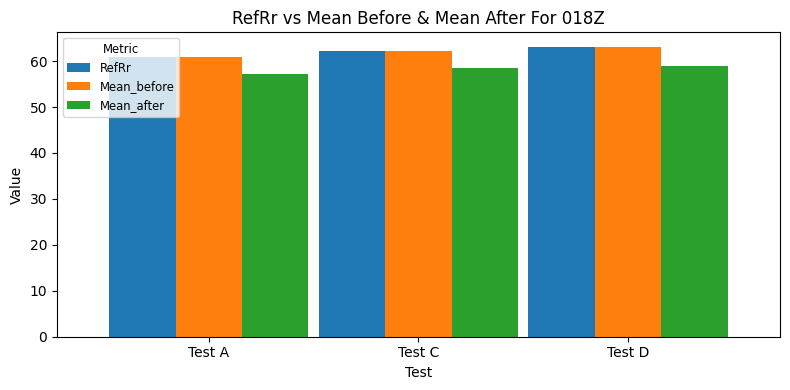

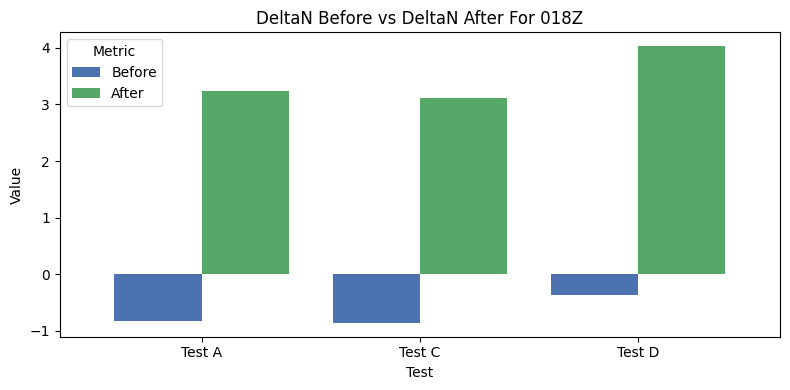

In [21]:
import pandas as pd

# data file
filename = '018Z.txt'

# Containers for parsed results
results = {
    'Test': [],
    'Mean_before': [],
    'DeltaN_before': [],
    'Mean_after': [],
    'DeltaN_after': [],
    'RefRr': []
}

with open(filename, 'r') as f:
    lines = f.readlines()

mode = None
for line in lines:
    line = line.strip()
    # switch context when hitting the date lines
    if line.startswith('23/05/2025'):
        mode = 'before'
        continue
    elif line.startswith('25/08/2025'):
        mode = 'after'
        continue

    # only data lines start with "Test"
    if not line.startswith('Test'):
        continue

    parts = line.split()
    # reconstruct the test name, e.g. "Test A"
    test_name = ' '.join(parts[0:2])
    # columns layout: Test, A, val1, val2, val3, Mean, N-value, N-ref., DeltaN, RefRr
    mean_val   = float(parts[5])
    delta_n    = float(parts[8])
    ref_rr_val = float(parts[9])

    if mode == 'before':
        results['Test'].append(test_name)
        results['Mean_before'].append(mean_val)
        results['DeltaN_before'].append(delta_n)
        # defer adding after values until later
        results['Mean_after'].append(None)
        results['DeltaN_after'].append(None)
        results['RefRr'].append(ref_rr_val)
    elif mode == 'after':
        # find existing row index for this test
        idx = results['Test'].index(test_name)
        results['Mean_after'][idx]   = mean_val
        results['DeltaN_after'][idx] = delta_n
        # verify RefRr consistency
        if results['RefRr'][idx] != ref_rr_val:
            raise ValueError(f"RefRr mismatch for {test_name}")

# build final DataFrame
df = pd.DataFrame(results).set_index('Test')

# display with full precision
pd.options.display.precision = 6
print(df)


import matplotlib.pyplot as plt

# Bar-chart for RefRr, Mean before and Mean after
ax1 = df[['RefRr', 'Mean_before', 'Mean_after']] \
    .plot(kind='bar', figsize=(8, 4), rot=0, width=0.95)

ax1.set_title('RefRr vs Mean Before & Mean After For 018Z')
ax1.set_xlabel('Test')
ax1.set_ylabel('Value')

ax1.legend(
    title='Metric',
    fontsize='small',          
    title_fontsize='small',    
    loc='upper left',                        
)

plt.tight_layout()
plt.show()


# Bar-chart for DeltaN before and DeltaN after
ax2 = df[['DeltaN_before', 'DeltaN_after']] \
    .plot(kind='bar', figsize=(8, 4), color=['#4C72B0','#55A868'], rot=0, width=0.8)

ax2.set_title('DeltaN Before vs DeltaN After For 018Z')
ax2.set_xlabel('Test')
ax2.set_ylabel('Value')
ax2.legend(title='Metric', labels=['Before','After'])
plt.tight_layout()
plt.show()




STANDARD LAMP 018X TESTS COMPARISON BEFORE AND AFTER CALIBRATIONS

        Mean_before  DeltaN_before  Mean_after  DeltaN_after
Test                                                        
Test A         61.0          -0.21        57.0          3.99
Test C         62.1          -0.24        58.3          3.87
Test D         63.1           0.33        59.0          4.85


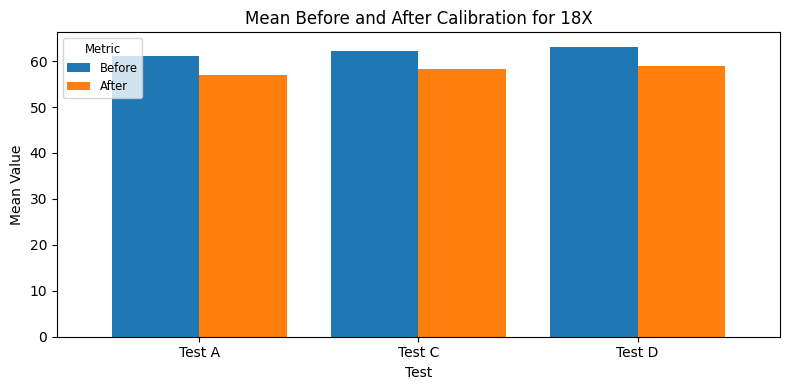

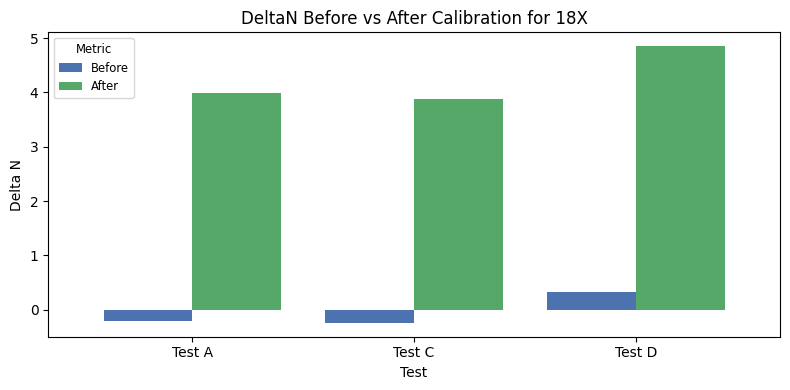

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Read and parse the data file
filename = '018X.txt'

results = {
    'Test': [],
    'Mean_before': [],
    'DeltaN_before': [],
    'Mean_after': [],
    'DeltaN_after': [],
}

with open(filename, 'r') as f:
    lines = f.readlines()

mode = None
for line in lines:
    line = line.strip()
    # switch context based on the dates in the file
    if line.startswith('25/04/2025'):
        mode = 'before'
        continue
    elif line.startswith('25/08/2025'):
        mode = 'after'
        continue

    # only parse lines starting with 'Test'
    if not line.startswith('Test'):
        continue

    parts    = line.split()
    test_name = parts[0] + ' ' + parts[1]        
    mean_val  = float(parts[5])                 
    delta_n   = float(parts[8])                  

    if mode == 'before':
        results['Test'].append(test_name)
        results['Mean_before'].append(mean_val)
        results['DeltaN_before'].append(delta_n)
        # placeholders for “after” measurements
        results['Mean_after'].append(None)
        results['DeltaN_after'].append(None)

    elif mode == 'after':
        # find the existing row by test name and fill in after‐values
        idx = results['Test'].index(test_name)
        results['Mean_after'][idx]   = mean_val
        results['DeltaN_after'][idx] = delta_n

# build a DataFrame and set Test as the index
df = pd.DataFrame(results).set_index('Test')

# show full numeric precision
pd.options.display.precision = 6
print(df)



# Plot “Mean before” vs “Mean after”
ax1 = df[['Mean_before', 'Mean_after']].plot(
    kind='bar', figsize=(8, 4), rot=0, width=0.8
)
ax1.set_title('Mean Before and After Calibration for 18X')
ax1.set_xlabel('Test')
ax1.set_ylabel('Mean Value')
ax1.legend(
    title='Metric',
    labels=['Before', 'After'],
    fontsize='small',
    title_fontsize='small',
    loc='upper left'
)
plt.tight_layout()
plt.show()


# Plot “DeltaN before” vs “DeltaN after”
ax2 = df[['DeltaN_before', 'DeltaN_after']].plot(
    kind='bar',
    figsize=(8, 4),
    color=['#4C72B0', '#55A868'],
    rot=0,
    width=0.8
)
ax2.set_title('DeltaN Before vs After Calibration for 18X')
ax2.set_xlabel('Test')
ax2.set_ylabel('Delta N')
ax2.legend(
    title='Metric',
    labels=['Before', 'After'],
    fontsize='small',
    title_fontsize='small',
    loc='upper left'
)
plt.tight_layout()
plt.show()


MERCURY LAMP TESTS COMPARISON BEFORE AND AFTER CALIBRATIONS

        Test Mean  Table Value  Difference
Before      84.80         84.8        0.00
After       84.43         84.8       -0.37


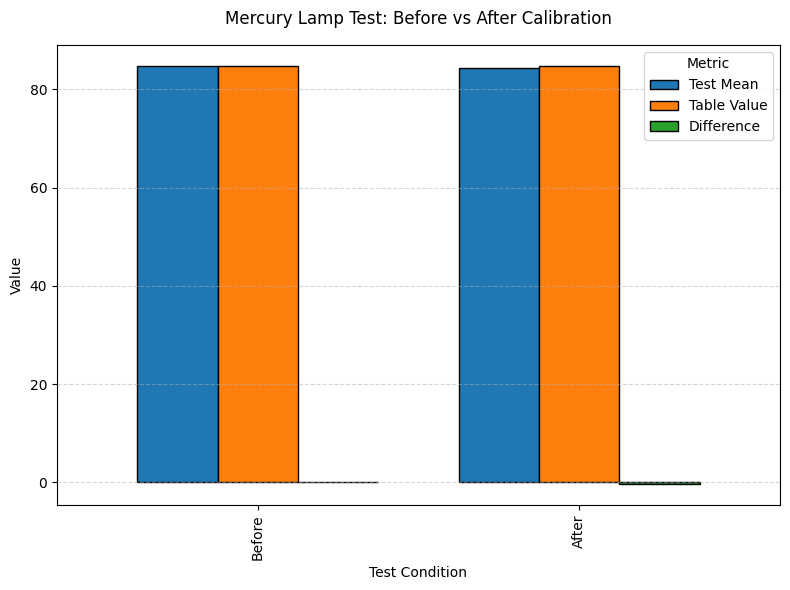

In [ ]:
import pandas as pd

# Read the data file
filename = 'HG2.txt'

# Prepare containers
data = {
    'Test Mean':     {},
    'Table Value':   {},
    'Difference':    {}
}

mode = None
with open(filename) as f:
    for line in f:
        line = line.strip()
        # Detect section
        if line.startswith('23/05/2025'):
            mode = 'Before'
        elif line.startswith('25/08/2025'):
            mode = 'After'
        # Extract the three metrics
        elif line.startswith('Test Mean:'):
            data['Test Mean'][mode] = float(line.split(':',1)[1])
        elif line.startswith('Table Value at Mean Temperature:'):
            data['Table Value'][mode] = float(line.split(':',1)[1])
        elif line.startswith('Difference:'):
            data['Difference'][mode] = float(line.split(':',1)[1])

# Build a DataFrame: rows = Before/After, cols = metrics
df = pd.DataFrame(data)
pd.options.display.precision = 2

print(df)

import pandas as pd
import matplotlib.pyplot as plt

# Parse the HG2.txt file and build the DataFrame
filename = 'HG2.txt'
data = {'Test Mean': {}, 'Table Value': {}, 'Difference': {}}

mode = None
with open(filename) as f:
    for line in f:
        line = line.strip()
        if line.startswith('23/05/2025'):
            mode = 'Before'
        elif line.startswith('25/08/2025'):
            mode = 'After'
        elif line.startswith('Test Mean:'):
            data['Test Mean'][mode] = float(line.split(':', 1)[1])
        elif line.startswith('Table Value at Mean Temperature:'):
            data['Table Value'][mode] = float(line.split(':', 1)[1])
        elif line.startswith('Difference:'):
            data['Difference'][mode] = float(line.split(':', 1)[1])

df = pd.DataFrame(data)
df.index.name = 'Condition'
pd.options.display.precision = 2

# Plot a grouped bar chart
ax = df.plot(
    kind='bar',
    figsize=(8, 6),
    width=0.75,
    edgecolor='black'
)

# Polish the plot
ax.set_title('Mercury Lamp Test: Before vs After Calibration', pad=15)
ax.set_xlabel('Test Condition')
ax.set_ylabel('Value')
ax.legend(title='Metric', loc='upper right')
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()
